## Exploratory Data Analysis (EDA)

This notebook explores the dataset to understand its structure, identify important features, and examine data quality issues such as missing values, outliers, and inconsistencies.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"diabetes_dataset.csv")

## Data Profiling

In [3]:
df.shape

(100000, 16)

In [4]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

## No missing values detected.

In [6]:
df.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

## 14 duplicate rows were found and need to be removed.

In [7]:
df.duplicated().sum()

np.int64(14)

## Some numerical features have potential outliers.

## age has a minimum value of 0.08, which could indicate infants (or errors).

In [8]:
df.describe(include='all')

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,3,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,NaN,Female,NaN,Kentucky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,NaN,58552,NaN,2038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,2018.360820,NaN,41.885856,NaN,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,1.345239,NaN,22.516840,NaN,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,2015.000000,NaN,0.080000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,NaN,24.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,NaN,43.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,NaN,60.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


## gender has 3 values: 'Male', 'Female', 'Other'
## The history of smoking consists of 6 almost similar categories.

In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"The Column: {column}")
    print(f"Count of Unique Values: {len(unique_values)}")
    print(f"The Unique Values: {unique_values}")
    print("-" * 50)

The Column: year
Count of Unique Values: 7
The Unique Values: [2020 2015 2016 2019 2018 2021 2022]
--------------------------------------------------
The Column: gender
Count of Unique Values: 3
The Unique Values: ['Female' 'Male' 'Other']
--------------------------------------------------
The Column: age
Count of Unique Values: 102
The Unique Values: [32.   29.   18.   41.   52.   66.   49.   15.   51.   42.   53.    3.
 40.   64.   23.    2.   80.   12.   50.   69.   75.   72.   46.   47.
 14.   24.   55.   13.   31.   38.   67.   61.   79.    8.   11.   71.
 25.    5.    6.   28.    4.   54.   43.   65.    7.   48.    1.32 63.
 59.   39.   19.   62.   45.   44.   73.   10.   26.   22.   68.   57.
  0.8  60.   30.   58.   77.   56.   37.   20.   21.    9.   36.   35.
  1.   17.   78.   16.    0.48 27.   70.    0.64  1.56  1.72 74.    1.16
 33.   34.   76.    1.08  0.16  1.24  0.08  0.72  0.32  0.24  0.4   1.64
  1.88  1.4   1.48  0.56  0.88  1.8 ]
------------------------------------

## 'other' represents only 0.018%, so it can be deleted.

In [10]:
gender_counts = df['gender'].value_counts(normalize=True) * 100
print(gender_counts)

gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64


## Outliers

### The 'age' column looks fine with no clear outliers, while the other columns contain some — especially 'bmi', which has a large number of outliers.

In [11]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Number of outliers in '{column}': {outliers.shape[0]}")
    if outliers.shape[0] > 0:
        print(outliers[[column]])
    else:
        print("No outliers found.")
    print("\n")

numeric_columns = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']

for col in numeric_columns:
    detect_outliers_iqr(df, col)

Number of outliers in 'age': 0
No outliers found.


Number of outliers in 'bmi': 7086
         bmi
14     49.27
50     44.10
53     40.17
62     39.93
67     48.06
...      ...
99952  45.52
99969  13.90
99970  50.31
99983  14.55
99985  42.09

[7086 rows x 1 columns]


Number of outliers in 'hbA1c_level': 1315
       hbA1c_level
29             8.8
127            9.0
132            9.0
222            9.0
301            9.0
...            ...
99620          9.0
99702          9.0
99871          9.0
99959          8.8
99977          8.8

[1315 rows x 1 columns]


Number of outliers in 'blood_glucose_level': 2038
       blood_glucose_level
112                    280
120                    280
127                    260
132                    280
297                    300
...                    ...
99799                  280
99865                  300
99920                  280
99942                  300
99953                  260

[2038 rows x 1 columns]




## Visualization

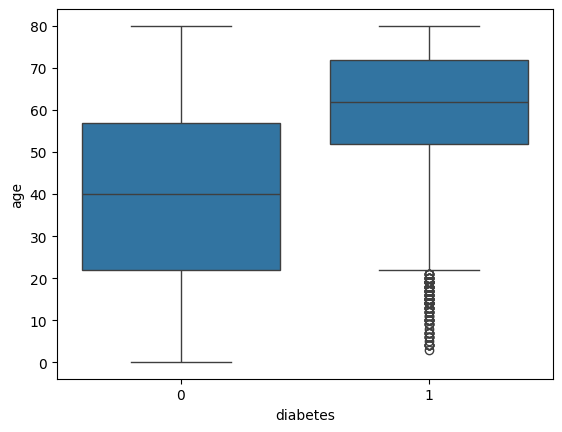

In [12]:
sns.boxplot(x="diabetes", y="age", data=df)
plt.show()

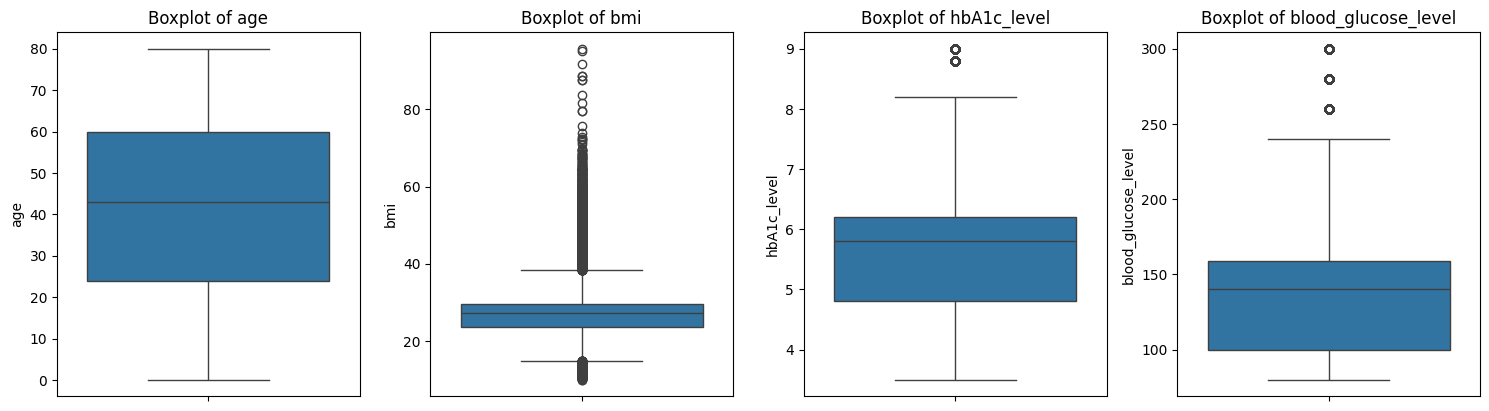

In [13]:
numeric_cols = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

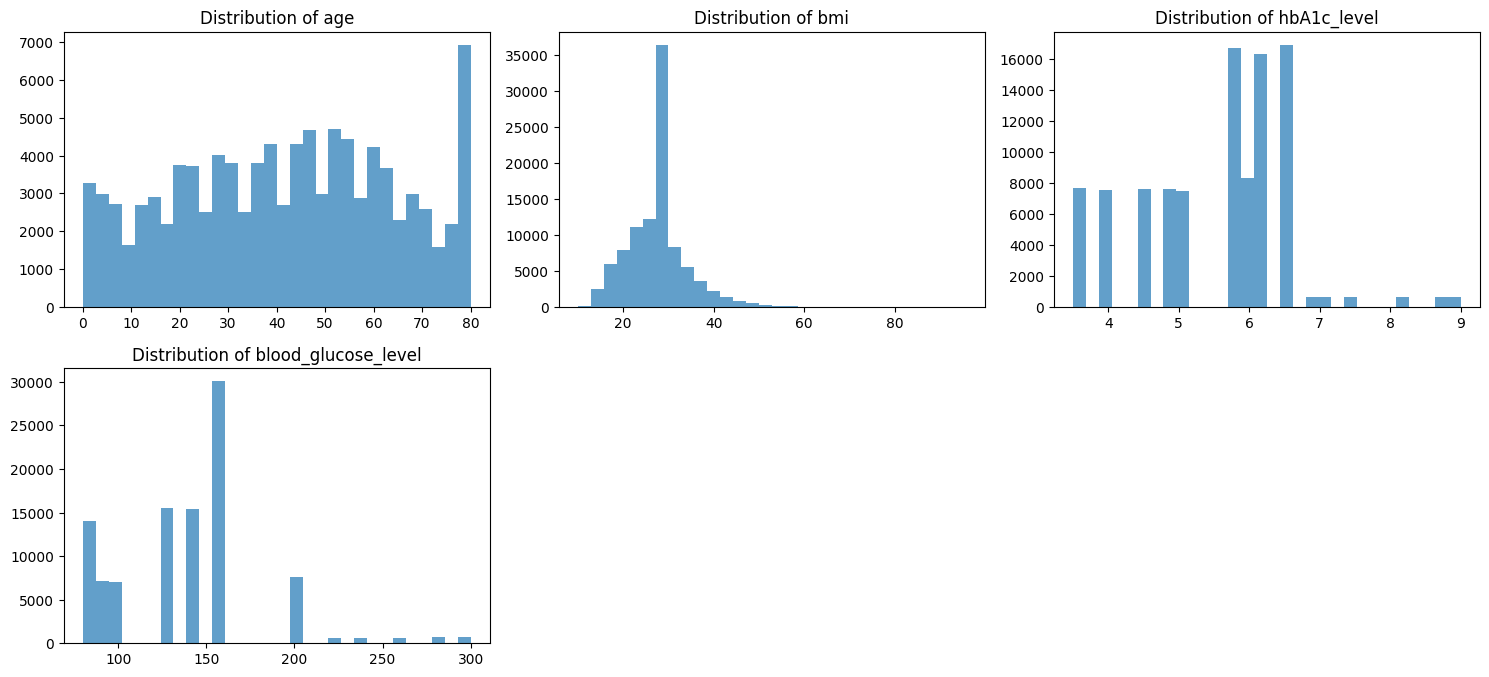

In [14]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=30, alpha=0.7)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## The highest correlation was between 'age' and 'bmi', with a moderate value of 0.34.
## Overall, correlations between numeric features were generally weak.

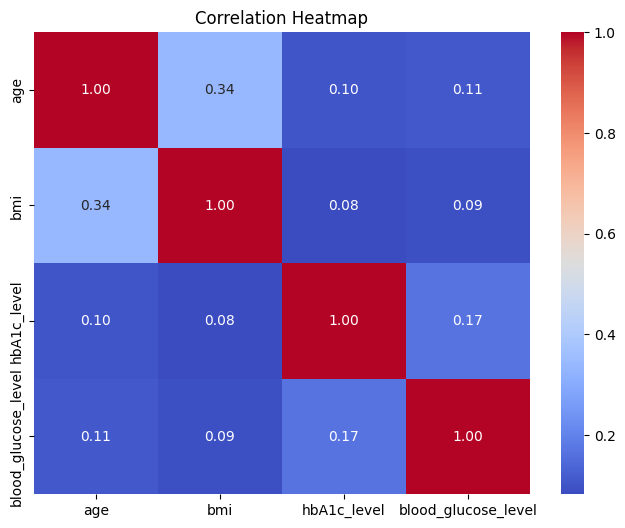

In [16]:
numeric_cols = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

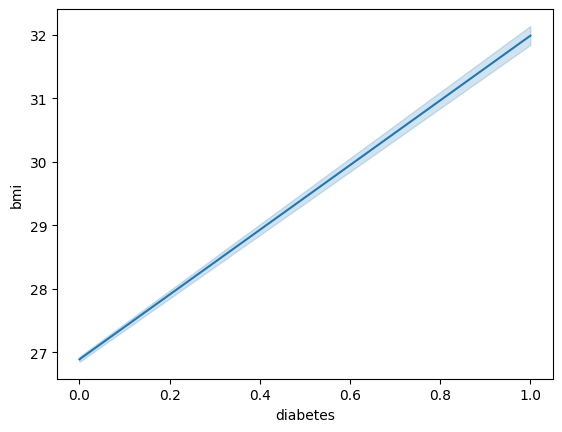

In [15]:
sns.lineplot(x="diabetes", y="bmi", data=df)
plt.show()

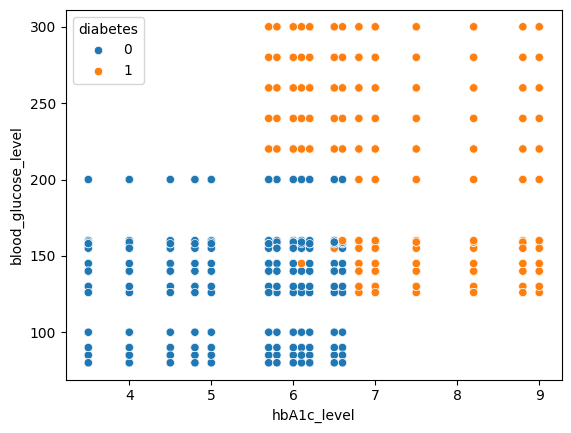

In [36]:
sns.scatterplot(x="hbA1c_level", y="blood_glucose_level", hue="diabetes", data=df)
plt.show()


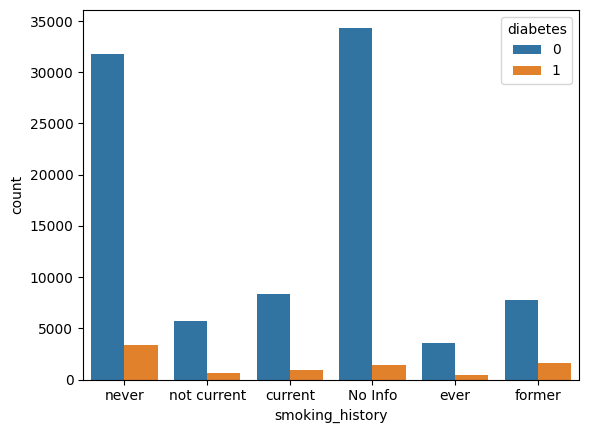

In [37]:
sns.countplot(x="smoking_history", hue="diabetes", data=df)
plt.show()


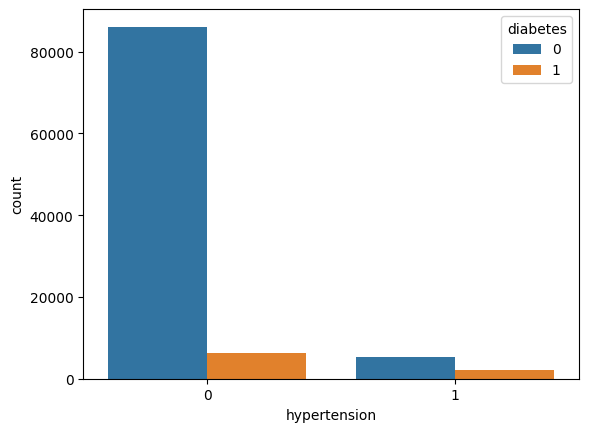

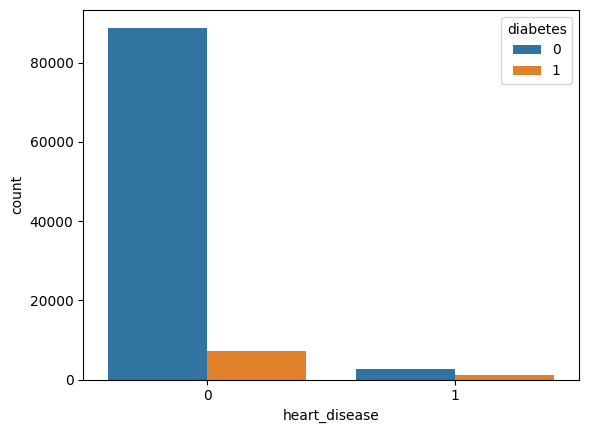

In [38]:
sns.countplot(x="hypertension", hue="diabetes", data=df)
plt.show()

sns.countplot(x="heart_disease", hue="diabetes", data=df)
plt.show()

## 🔍 Summary of Data Exploration

- 📊 **Dataset Size:** 100,000 rows, 16 columns.
- 🧼 **Missing Values:** None found.
- 🔁 **Duplicate Rows:** 14 rows detected and removed.
- 📈 **Age Column:**
  - Ranges from 0.08 to 80.
  - Contains suspiciously low values (likely data entry errors).
- ⚖️ **Gender:**
  - 3 categories: Female (58.5%), Male (41.4%), Other (0.018%).
  - 'Other' category has very low proportion → dropped.
- 🩺 **Outliers Detected:**
  - BMI → 7,086 values.
  - HbA1c Level → 1,315 values.
  - Blood Glucose Level → 2,038 values.
  - Age → No IQR-based outliers but has tiny values worth flagging.
- 🚬 **Smoking History:**
  - 6 categories including 'No Info' → might need handling later.


## Data Preprocessing

This notebook performs essential preprocessing steps to prepare the dataset for modeling. The steps include:

Handling missing data (if present) through removal or imputation

Identifying and treating duplicates

Detecting rare or inconsistent values and resolving them

Creating additional features to support visualization (without affecting modeling features)

Encoding categorical variables for model compatibility

Preparing the dataset for normalization or standardization (to be completed in the next stage)

The result is a cleaned and structured dataset ready for further analysis and modeling.

Note: Normalization/standardization and outlier treatment will be addressed in the next notebook.

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(99986, 16)

## The 'Other' percentage was less than 1% (0.018%) → therefore, these rows were removed.

In [14]:
df = df[df['gender'] != 'Other']

In [15]:
df.shape

(99968, 16)

## The new columns (age_group, get_race, classify_bmi) were added solely to assist in the data visualization phase.

In [16]:
def age_group(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 30:
        return 'Young Adult'
    elif 30 <= age < 45:
        return 'Adult'
    elif 45 <= age < 60:
        return 'Middle Age'
    elif 60 <= age < 75:
        return 'Senior'
    else:
        return 'Elderly'

df['age_group'] = df['age'].apply(age_group)

In [17]:
race_cols = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']

def get_race(row):
    for col in race_cols:
        if row[col] == 1:
            return col.split(':')[1]
    return 'Unknown'

df['race_category'] = df.apply(get_race, axis=1)

In [18]:
def classify_bmi(value):
    if value < 18.5:
        return 'Underweight'
    elif 18.5 <= value < 25:
        return 'Normal'
    elif 25 <= value < 30:
        return 'Overweight'
    elif 30 <= value < 35:
        return 'Obesity I'
    elif 35 <= value < 40:
        return 'Obesity II'
    else:
        return 'Obesity III'

df['bmi_category'] = df['bmi'].apply(classify_bmi)

In [19]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,age_group,race_category,bmi_category
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,Adult,Other,Overweight
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Young Adult,Asian,Normal
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,Young Adult,Other,Normal
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,Adult,Caucasian,Overweight
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,Middle Age,AfricanAmerican,Normal
